In [ ]:
# installation
!pip install pandas pyarrow fastparquet

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
agent_info_df = pd.read_parquet('/content/drive/MyDrive/data/nus_agent_info_df.parquet')
client_info_df = pd.read_parquet('/content/drive/MyDrive/data/nus_client_info_df.parquet')
policy_info_df = pd.read_parquet('/content/drive/MyDrive/data/nus_policy_info_df.parquet')
sample_final_df = pd.read_parquet('/content/drive/MyDrive/data/sample_final_modelling_df.parquet')


In [ ]:
!pip install pandas pyarrow fastparquet session-info
import session_info
session_info.show(html=False)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=1e526c937c9c36a0758a127d5f174928e981ba1d60b4d31ea6da31e1e54f1067
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info
-----
session_info        1.0.0
-----
IPython             7.34.0
jupyter_client      6.1.12
jupyter_core        5.7.2
notebook            6.5.5
-----
Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Linux-6.1.85+-x86_64-with-glibc2.35
-----
Session information updated at 2025-02-06 15:24


In [ ]:
# === 1. Check Data Integrity ===
print("【Data Integrity Check】")
print(f"agent_info_df: {agent_info_df.shape}")
print(f"client_info_df: {client_info_df.shape}")
print(f"policy_info_df: {policy_info_df.shape}")
print(f"sample_final_df: {sample_final_df.shape}")

# === 2. Check Missing Values ===
print("\n【Missing Values Check】")
print("Agent Info Missing Values:\n", agent_info_df.isnull().sum())
print("\nClient Info Missing Values:\n", client_info_df.isnull().sum())
print("\nPolicy Info Missing Values:\n", policy_info_df.isnull().sum())
print("\nSample Final Missing Values:\n", sample_final_df.isnull().sum())

# === 3. Check Data Types ===
print("\n【Data Type Check】")
print("Agent Info:\n", agent_info_df.dtypes)
print("\nClient Info:\n", client_info_df.dtypes)
print("\nPolicy Info:\n", policy_info_df.dtypes)
print("\nSample Final:\n", sample_final_df.dtypes)

# === 4. Descriptive Statistics for Numerical Variables ===
print("\n【Descriptive Statistics】")
print("Agent Info:\n", agent_info_df.describe())
print("\nClient Info:\n", client_info_df.describe())
print("\nPolicy Info:\n", policy_info_df.describe())
print("\nSample Final:\n", sample_final_df.describe())

# === 5. Check Unique Keys ===
print("\n【Unique Key Check】")
print("Unique Agent Count in Agent Info: ", agent_info_df['agntnum'].nunique() == len(agent_info_df))
print("Unique Client Count in Client Info: ", client_info_df['secuityno'].nunique() == len(client_info_df))
print("Unique Policy Count in Policy Info: ", policy_info_df['chdrnum'].nunique() == len(policy_info_df))

# === 6. Relationship Check (Verify ID Matching) ===
print("\n【Relationship Check】")
print("Are all agent IDs in Policy Info present in Agent Info?: ", policy_info_df['agntnum'].isin(agent_info_df['agntnum']).all())
print("Are all customer IDs in Policy Info present in Client Info?: ", policy_info_df['secuityno'].isin(client_info_df['secuityno']).all())

print("\n✅ **Data Check Completed!**")


【數據完整性檢查】
agent_info_df: (10129, 35)
client_info_df: (20000, 11)
policy_info_df: (29503, 16)
sample_final_df: (29503, 14)

【缺失值檢查】
Agent Info 缺失值:
 agntnum                     0
agent_age                  12
agent_gender                0
agent_marital               0
agent_tenure                0
cnt_converted               0
annual_premium_cnvrt        0
pct_lapsed                  0
pct_cancel                  0
pct_inforce                 0
pct_prod_0_cnvrt            0
pct_prod_1_cnvrt            0
pct_prod_2_cnvrt            0
pct_prod_3_cnvrt            0
pct_prod_4_cnvrt            0
pct_prod_5_cnvrt            0
pct_prod_6_cnvrt            0
pct_prod_7_cnvrt            0
pct_prod_8_cnvrt            0
pct_prod_9_cnvrt            0
pct_SX0_unknown             0
pct_SX1_male                0
pct_SX2_female              0
pct_AG01_lt20               0
pct_AG02_20to24             0
pct_AG03_25to29             0
pct_AG04_30to34             0
pct_AG05_35to39             0
pct_AG06_40t

In [ ]:
# Identify columns in policy_info_df that contain only a single unique value
single_value_columns = [col for col in policy_info_df.columns if policy_info_df[col].nunique() == 1]

# List the columns to be removed
print("🚀 The following columns contain only a single value and will be removed:")
print(single_value_columns)

# Drop these columns
policy_info_df_cleaned = policy_info_df.drop(columns=single_value_columns)

# Display the structure of the DataFrame after column removal
print("\n✅ DataFrame structure after column removal:")
print(policy_info_df_cleaned.info())

# Save the cleaned file if needed
policy_info_df_cleaned.to_parquet("cleaned_policy_info.parquet", index=False)



🚀 以下欄位因為只有單一值，將被刪除：
['flg_main', 'flg_rider', 'flg_cancel', 'flg_converted']

✅ 刪除後的 DataFrame 結構：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   chdrnum                      29503 non-null  object        
 1   agntnum                      29503 non-null  object        
 2   secuityno                    29503 non-null  object        
 3   occdate                      29503 non-null  datetime64[us]
 4   annual_premium               29503 non-null  float64       
 5   product                      29503 non-null  object        
 6   flg_inforce                  29503 non-null  int64         
 7   flg_lapsed                   29503 non-null  int64         
 8   flg_expire                   29503 non-null  int64         
 9   product_grp                  29503 non-null  object        
 10  cust_ag

In [ ]:
# Convert household_size, economic_status, family_size to float
client_info_df["household_size"] = pd.to_numeric(client_info_df["household_size"], errors="coerce")
client_info_df["economic_status"] = pd.to_numeric(client_info_df["economic_status"], errors="coerce")
client_info_df["family_size"] = pd.to_numeric(client_info_df["family_size"], errors="coerce")

# Check data types after conversion
print("✅ Data types after conversion:")
print(client_info_df[["household_size", "economic_status", "family_size"]].dtypes)

# Check for any missing values (NaN) after conversion
missing_after_conversion = client_info_df[["household_size", "economic_status", "family_size"]].isnull().sum()
print("\n🔍 Missing values after conversion:")
print(missing_after_conversion)



✅ 轉換後的數據類型：
household_size     float64
economic_status    float64
family_size        float64
dtype: object

🔍 轉換後的缺失值統計：
household_size     343
economic_status    343
family_size        343
dtype: int64


In [ ]:

# === 1️⃣ Fill missing values in all numerical columns with the median ===
for df in [agent_info_df, client_info_df, policy_info_df, sample_final_df]:
    for col in df.select_dtypes(include=["number"]).columns:
        df[col].fillna(df[col].median(), inplace=True)

print("✅ Filled all missing values in numerical columns with the median.")

# === 2️⃣ Drop missing values that cannot be filled with the median ===
# Define columns to drop missing values
columns_to_drop_na = ["cltdob", "race_desc_map", "cltpcode"]

# Drop these missing values from client_info_df and sample_final_df
client_info_df.dropna(subset=columns_to_drop_na, inplace=True)
sample_final_df.dropna(subset=["cltdob", "race_desc_map"], inplace=True)

print("✅ Dropped missing values for non-numerical columns.")

# === 3️⃣ Verify if there are still missing values after cleanup ===
missing_values_after_cleanup = {
    "agent_info_missing": agent_info_df.isnull().sum().sum(),
    "client_info_missing": client_info_df.isnull().sum().sum(),
    "policy_info_missing": policy_info_df.isnull().sum().sum(),
    "sample_final_missing": sample_final_df.isnull().sum().sum(),
}

print("\n✅ Statistics of missing values after cleanup:")
print(missing_values_after_cleanup)

# (Optional) Save cleaned data to Parquet files
agent_info_df.to_parquet("cleaned_nus_agent_info_df.parquet", index=False)
client_info_df.to_parquet("cleaned_nus_client_info_df.parquet", index=False)
policy_info_df.to_parquet("cleaned_nus_policy_info_df.parquet", index=False)
sample_final_df.to_parquet("cleaned_sample_final_modelling_df.parquet", index=False)

print("\n✅ Cleanup completed and files saved.")



<ipython-input-7-a459c673b9dc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-7-a459c673b9dc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

✅ 已使用中位數填補所有數值型欄位的缺失值
✅ 已刪除非數值型欄位的缺失值

✅ 清理後的缺失值統計：
{'agent_info_missing': 0, 'client_info_missing': 0, 'policy_info_missing': 0, 'sample_final_missing': 0}

✅ ready


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Set today's date
today = datetime(2025, 2, 2)

# **1️⃣ Calculate client's exact age**
client_info_df["cltdob"] = pd.to_datetime(client_info_df["cltdob"], errors="coerce")
client_info_df["exact_age"] = client_info_df["cltdob"].apply(lambda dob: today.year - dob.year if pd.notnull(dob) else np.nan)

# **2️⃣ Fill missing ages with the median age**
median_age = client_info_df["exact_age"].median()
client_info_df["exact_age"].fillna(median_age, inplace=True)

# **3️⃣ Group clients by age range and assign `pct_AGxx_xx` columns**
def assign_age_group(age):
    if age < 20:
        return "pct_AG01_lt20"
    elif 20 <= age <= 24:
        return "pct_AG02_20to24"
    elif 25 <= age <= 29:
        return "pct_AG03_25to29"
    elif 30 <= age <= 34:
        return "pct_AG04_30to34"
    elif 35 <= age <= 39:
        return "pct_AG05_35to39"
    elif 40 <= age <= 44:
        return "pct_AG06_40to44"
    elif 45 <= age <= 49:
        return "pct_AG07_45to49"
    elif 50 <= age <= 54:
        return "pct_AG08_50to54"
    elif 55 <= age <= 59:
        return "pct_AG09_55to59"
    else:
        return "pct_AG10_60up"

# **4️⃣ Map age ranges to `pct_AGxx_xx` columns**
client_info_df["age_group"] = client_info_df["exact_age"].apply(assign_age_group)

# **5️⃣ Create `pct_AGxx_xx` columns and initialize to 0**
age_group_columns = [
    "pct_AG01_lt20", "pct_AG02_20to24", "pct_AG03_25to29",
    "pct_AG04_30to34", "pct_AG05_35to39", "pct_AG06_40to44",
    "pct_AG07_45to49", "pct_AG08_50to54", "pct_AG09_55to59",
    "pct_AG10_60up"
]

for col in age_group_columns:
    client_info_df[col] = 0

# **6️⃣ Set the corresponding age group column to 1**
for index, row in client_info_df.iterrows():
    client_info_df.at[index, row["age_group"]] = 1

# **8️⃣ Save the cleaned data**
client_info_df.to_parquet("cleaned_nus_client_info_df.parquet", index=False)

client_info_df.head()


NameError: name 'client_info_df' is not defined

In [ ]:
# Check the data type and missing value status of the 'exact_age' column
print("\n✅ Info for 'exact_age':")
print(client_info_df[["exact_age"]].info())

# View descriptive statistics for the 'exact_age' column
print("\n✅ Descriptive statistics for 'exact_age' (describe()):")
print(client_info_df["exact_age"].describe())



✅ exact_age 的 info():
<class 'pandas.core.frame.DataFrame'>
Index: 19834 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   exact_age  19834 non-null  int64
dtypes: int64(1)
memory usage: 825.9 KB
None

✅ exact_age 的描述性統計 (describe()):
count    19834.000000
mean        46.595341
std         10.995267
min         19.000000
25%         38.000000
50%         46.000000
75%         54.000000
max         85.000000
Name: exact_age, dtype: float64


In [ ]:
import pandas as pd

# Load the original agent_info_df
agent_info_df = pd.read_parquet('/content/drive/MyDrive/data/nus_agent_info_df.parquet')

# === 1️⃣ Convert columns to integer format (no decimal places) ===
integer_columns = [
    "agent_tenure", "cnt_converted", "annual_premium_cnvrt"
]
agent_info_df[integer_columns] = agent_info_df[integer_columns].astype(int)

# === 2️⃣ Round columns to 3 decimal places ===
decimal_columns = [
    "pct_cancel", "pct_inforce",
    "pct_prod_0_cnvrt", "pct_prod_1_cnvrt", "pct_prod_2_cnvrt", "pct_prod_3_cnvrt",
    "pct_prod_4_cnvrt", "pct_prod_5_cnvrt", "pct_prod_6_cnvrt", "pct_prod_7_cnvrt",
    "pct_prod_8_cnvrt", "pct_prod_9_cnvrt",
    "pct_SX0_unknown", "pct_SX1_male", "pct_SX2_female",
    "pct_AG01_lt20", "pct_AG02_20to24", "pct_AG03_25to29", "pct_AG04_30to34",
    "pct_AG05_35to39", "pct_AG06_40to44", "pct_AG07_45to49", "pct_AG08_50to54",
    "pct_AG09_55to59", "pct_AG10_60up"
]
agent_info_df[decimal_columns] = agent_info_df[decimal_columns].round(3)

# === 3️⃣ Save the cleaned DataFrame ===
agent_info_df.to_parquet("formatted_nus_agent_info_df.parquet", index=False)

# === 4️⃣ Verify the formatting results ===
print("\n✅ Formatting complete! Data has been saved to formatted_nus_agent_info_df.parquet 🚀")
print("\n🔍 Preview the formatted data (First 5 rows):")
print(agent_info_df[integer_columns + decimal_columns].head())




✅ 整理完成！已格式化數據並存入 formatted_nus_agent_info_df.parquet 🚀

🔍 檢查數據格式（前 5 筆資料）：
   agent_tenure  cnt_converted  annual_premium_cnvrt  pct_cancel  pct_inforce  \
0            15             21                 10049       0.815        0.000   
1            18            396                197108       0.084        0.429   
2            40            853                510635       0.017        0.712   
3            41            554                351472       0.004        0.585   
4            62           1525               1215380       0.018        0.641   

   pct_prod_0_cnvrt  pct_prod_1_cnvrt  pct_prod_2_cnvrt  pct_prod_3_cnvrt  \
0               0.0               0.0             0.286               0.0   
1               0.0               0.0             0.129               0.0   
2               0.0               0.0             0.243               0.0   
3               0.0               0.0             0.195               0.0   
4               0.0               0.0             0.

In [ ]:
import pandas as pd

# Load the original agent_info_df
agent_info_df = pd.read_parquet("formatted_nus_agent_info_df.parquet")

# === 1️⃣ Add new columns for age group percentages: "Young", "Middle-aged", and "Senior" ===
agent_info_df["pct_young"] = (
    agent_info_df["pct_AG02_20to24"] +
    agent_info_df["pct_AG03_25to29"] +
    agent_info_df["pct_AG04_30to34"] +
    agent_info_df["pct_AG05_35to39"]
)

agent_info_df["pct_middle"] = (
    agent_info_df["pct_AG06_40to44"] +
    agent_info_df["pct_AG07_45to49"] +
    agent_info_df["pct_AG08_50to54"]
)

agent_info_df["pct_senior"] = (
    agent_info_df["pct_AG09_55to59"] +
    agent_info_df["pct_AG10_60up"]
)

# === 2️⃣ Save the updated DataFrame ===
agent_info_df.to_parquet("cleaned_nus_agent_info_df.parquet", index=False)

# === 3️⃣ Verify that the new columns were added successfully ===
print("\n✅ Newly added age group percentage columns (First 5 rows):")
print(agent_info_df[["pct_young", "pct_middle", "pct_senior"]].head())

print("\n✅ Columns added successfully! The original parquet file has been updated 🚀")
agent_info_df

FileNotFoundError: [Errno 2] No such file or directory: 'formatted_nus_agent_info_df.parquet'

# Model training

In [ ]:
# Importing required libraries for Recommendation System

import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

# Loading data (please replace with your own CSV or parquet paths)
agent_df = pd.read_parquet('/content/drive/MyDrive/data/cleaned_nus_agent_info_df.parquet')
client_df = pd.read_parquet('/content/drive/MyDrive/data/cleaned_nus_client_info_df.parquet')
policy_df = pd.read_parquet('/content/drive/MyDrive/data/cleaned_nus_policy_info_df.parquet')

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

# **Step 1: Split 80% training set / 20% testing set**
policy_df_train, policy_df_test = train_test_split(policy_df, test_size=0.2, random_state=42)

# **Step 2: Process client data**
# Convert `cltsex` and `marryd` to numerical values
client_df['cltsex'] = client_df['cltsex'].astype('category').cat.codes  # Convert M, F to 0, 1
client_df['marryd'] = client_df['marryd'].astype('category').cat.codes  # Convert M, S, D to 0, 1, 2

# **Step 3: Calculate customer features served by agents (using only the training set)**
agent_customer_mapping = policy_df_train[['agntnum', 'secuityno']].merge(client_df, on='secuityno', how='left')

# **Step 4: Calculate the average features of customers served by each agent**
agent_preference = agent_customer_mapping.groupby('agntnum').mean(numeric_only=True)

# **Step 5: Fill NaN to ensure data completeness**
agent_preference.fillna(agent_preference.mean(numeric_only=True), inplace=True)

# **Step 6: Define feature weights**
feature_weights = np.array([0.3, 0.2, 0.2, 0.1, 0.1, 0.1])  # Corresponding to exact_age, economic_status, household_size, family_size, cltsex, marryd

# **Step 7: Generate recommendations for the 20% test set**
recommendations_list = []

for _, client in policy_df_test[['secuityno']].merge(client_df, on='secuityno', how='left').iterrows():
    client_vector = client[['exact_age', 'economic_status', 'household_size', 'family_size', 'cltsex', 'marryd']].astype(float).values.reshape(1, -1)

    # Get features of customers served by agents
    agent_vectors = agent_preference[['exact_age', 'economic_status', 'household_size', 'family_size', 'cltsex', 'marryd']].values
    agent_indices = agent_preference.index.tolist()

    # Ensure agent_vectors is not empty
    if len(agent_vectors) == 0:
        continue

    # Apply feature weights
    weighted_client_vector = client_vector * feature_weights
    weighted_agent_vectors = agent_vectors * feature_weights

    # Calculate weighted Euclidean distance
    distances = cdist(weighted_client_vector, weighted_agent_vectors, metric='euclidean')

    # Select the top 5 most similar agents
    top_indices = np.argsort(distances[0])[:20]

    for idx in top_indices:
        recommendations_list.append({
            'secuityno': client['secuityno'],
            'agntnum': agent_indices[idx],
            'predicted_score': 1 / (1 + distances[0][idx])  # Convert to similarity score
        })

# **Step 8: Output recommendation results**
recommendations = pd.DataFrame(recommendations_list)

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# **Step 1: Identify agents without historical transactions**
# Filter out agents with no transaction data
unmatched_agents = agent_df[~agent_df["agntnum"].isin(policy_df["agntnum"].unique())].copy()

# **Step 2: Prepare client and agent features**
client_features = ["cltsex", "marryd", "age"]
agent_features = ["agent_gender", "agent_marital", "agent_age"]

# Process categorical variables
unmatched_agents["agent_gender"] = unmatched_agents["agent_gender"].astype("category").cat.codes
unmatched_agents["agent_marital"] = unmatched_agents["agent_marital"].astype("category").cat.codes

client_df["cltsex"] = client_df["cltsex"].astype("category").cat.codes
client_df["marryd"] = client_df["marryd"].astype("category").cat.codes

# **Step 3: Define weights for fairness calculation**
# Assign equal weights to sex, marital status, and age
feature_weights = np.array([0.2, 0.3, 0.5])  # Adjust weights as needed

# **Step 4: Generate recommendations for unmatched agents**
fair_recommendations_list = []

for _, client in client_df.iterrows():
    # Create client vector
    client_vector = client[client_features].astype(float).values.reshape(1, -1)

    # Create agent vectors
    agent_vectors = unmatched_agents[agent_features].values
    agent_indices = unmatched_agents["agntnum"].tolist()

    # Ensure agent_vectors is not empty
    if len(agent_vectors) == 0:
        continue

    # Apply weights to client and agent vectors
    weighted_client_vector = client_vector * feature_weights
    weighted_agent_vectors = agent_vectors * feature_weights

    # Compute weighted Euclidean distance
    distances = cdist(weighted_client_vector, weighted_agent_vectors, metric="euclidean")

    # Select top 5 agents
    top_indices = np.argsort(distances[0])[:20]

    for idx in top_indices:
        fair_recommendations_list.append({
            "secuityno": client["secuityno"],
            "agntnum": agent_indices[idx],
            "fairness_score": 1 / (1 + distances[0][idx])  # Adjusted fairness score
        })


# **Step 5: Output the new recommendation list**
fair_recommendations = pd.DataFrame(fair_recommendations_list)

In [ ]:
# **Step 7: Combine Original and Fairness Scores**
# Merge fairness recommendations with original recommendations
combined_recommendations = pd.merge(
    recommendations,  # Original recommendations DataFrame
    fair_recommendations,  # Fairness-based recommendations DataFrame
    on=["secuityno", "agntnum"],  # Merge on client and agent IDs
    how="outer"  # Keep all records from both DataFrames
)

# Merge with agent_info_df to include cancellation rate(since we wish to avoid clients from being matched with agents with high cancellation rates)
combined_recommendations = pd.merge(
    combined_recommendations,
    agent_df[["agntnum", "pct_cancel"]],  # Include only agent ID and cancellation rate
    on="agntnum",
    how="left"
)

# Fill NaN values in predicted_score, fairness_score, and pct_cancel
combined_recommendations["predicted_score"].fillna(0, inplace=True)
combined_recommendations["fairness_score"].fillna(0, inplace=True)
combined_recommendations["pct_cancel"].fillna(0, inplace=True)  # If cancellation rate is missing, assume 0

# Calculate a combined score: Original score * 12 + (Fairness score *4) - (Cancellation rate*3)
# through obversation, we noticed that the scale of original score is between 0.2~0.5, fairness score is between 0.6~1, cancellation rate is between 0~0.9(wide range)
# therefore setting the weights as above

combined_recommendations["combined_score"] = (
    combined_recommendations["predicted_score"] * 12 +
    combined_recommendations["fairness_score"] * 4 -
    combined_recommendations["pct_cancel"] * 5
)

# **Step 8: Select Top 5 Agents per Client**
# Sort by secuityno and combined_score (descending)
combined_recommendations = combined_recommendations.sort_values(
    by=["secuityno", "combined_score"], ascending=[True, False]
)

# Group by client (secuityno) and select the top 5 agents for each client
final_recommendations = (
    combined_recommendations.groupby("secuityno")
    .head(5)  # Select top 5 agents for each client
    .reset_index(drop=True)
)

# **Step 9: Display or Save Final Recommendations**
print("\n✅ Final Top 5 Recommendations (with Cancellation Rate Adjusted):")
print(final_recommendations[["secuityno", "agntnum", "combined_score", "pct_cancel"]])

# Optional: Save the final recommendations to a file
final_recommendations.to_csv("final_recommendations_adjusted.csv", index=False)

<ipython-input-43-7e99cdea3b64>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_recommendations["predicted_score"].fillna(0, inplace=True)
<ipython-input-43-7e99cdea3b64>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp


✅ Final Top 5 Recommendations (with Cancellation Rate Adjusted):
      secuityno   agntnum  combined_score  pct_cancel
0         CIN:0   AIN:711        1.253463       0.014
1         CIN:0    AIN:53        0.857138       0.133
2         CIN:0   AIN:521        0.686212       0.179
3         CIN:0  AIN:1029        0.614269       0.000
4         CIN:0   AIN:854        0.180256       0.058
...         ...       ...             ...         ...
99390  CIN:9999   AIN:711        0.429421       0.014
99391  CIN:9999  AIN:1029        0.347697       0.000
99392  CIN:9999   AIN:854        0.006182       0.058
99393  CIN:9999   AIN:669       -0.017308       0.065
99394  CIN:9999   AIN:623       -0.111780       0.089

[99395 rows x 4 columns]


In [ ]:
# **Step 10: Evaluate Recommendations Based on Actual Transaction Counts**

# Initialize counters for confusion matrix
TP, FP, FN, TN = 0, 0, 0, 0

# Create a dictionary of actual agents for each client from the test data
actual_agents = (
    policy_df_test.groupby("secuityno")["agntnum"]
    .apply(set)
    .to_dict()
)

# Iterate over the actual agents and adjust the number of recommendations per client
for secuityno, actual_set in actual_agents.items():
    # Number of agents the client actually transacted with
    num_actual_agents = len(actual_set)

    # Get the top recommendations for this client based on the combined scores
    recommended_set = set(
        final_recommendations[final_recommendations["secuityno"] == secuityno]
        .nlargest(num_actual_agents, "combined_score")["agntnum"]
    )

    # Calculate True Positives, False Positives, and False Negatives
    TP += len(recommended_set & actual_set)  # True Positives
    FP += len(recommended_set - actual_set)  # False Positives
    FN += len(actual_set - recommended_set)  # False Negatives

    # Calculate the total number of possible client-agent pairs
    num_clients = policy_df_test["secuityno"].nunique()
    num_agents = agent_df["agntnum"].nunique()
    total_pairs = num_clients * num_agents

#  Calculate TN
TN = total_pairs - (TP + FP + FN)

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy= (TP+TN)/(TP+TN+FP+FN)

# Output the results
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (FN): {TN}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

True Positives (TP): 519
False Positives (FP): 4780
False Negatives (FN): 4932
True Negatives (FN): 53643082
Precision: 0.10
Recall: 0.10
F1 Score: 0.10
Accuracy: 1.00


In [ ]:
from sklearn.metrics import ndcg_score
import numpy as np

# **Step 1: Prepare actual and predicted relevance scores**
y_true = []
y_score = []

for secuityno, actual_set in actual_agents.items():
    # Get the number of agents the client actually transacted with
    num_actual_agents = len(actual_set)

    # Retrieve top recommendations for the client based on combined scores
    recommended_agents = (
        final_recommendations[final_recommendations["secuityno"] == secuityno]
        .nlargest(num_actual_agents, "combined_score")["agntnum"]
        .tolist()
    )
    predicted_scores = (
        final_recommendations[final_recommendations["secuityno"] == secuityno]
        .nlargest(num_actual_agents, "combined_score")["combined_score"]
        .tolist()
    )

    # Skip the client if no recommendations are available
    if not recommended_agents or len(predicted_scores) == 0:
        continue

    # Create actual relevance list
    true_relevance = [1 if agntnum in actual_set else 0 for agntnum in recommended_agents]
    y_true.append(true_relevance)
    y_score.append(predicted_scores)

# **Step 2: Handle NaN values and inconsistent list lengths**
# Find the maximum length of recommendation lists
max_len = max(len(scores) for scores in y_score) if y_score else 0

# Pad all lists to the maximum length using zeros
y_true_padded = np.array([np.pad(scores, (0, max_len - len(scores)), constant_values=0) for scores in y_true])
y_score_padded = np.array([np.pad(scores, (0, max_len - len(scores)), constant_values=0) for scores in y_score])

# **Step 3: Check for NaN values and remove them**
# Replace NaN values with 0 (useful for padding or numerical issues)
y_true_padded = np.nan_to_num(y_true_padded)
y_score_padded = np.nan_to_num(y_score_padded)

# **Step 4: Compute NDCG**
ndcg = ndcg_score(y_true_padded, y_score_padded)
print(f"Normalized Discounted Cumulative Gain (NDCG): {ndcg:.2f}")


Normalized Discounted Cumulative Gain (NDCG): 0.10


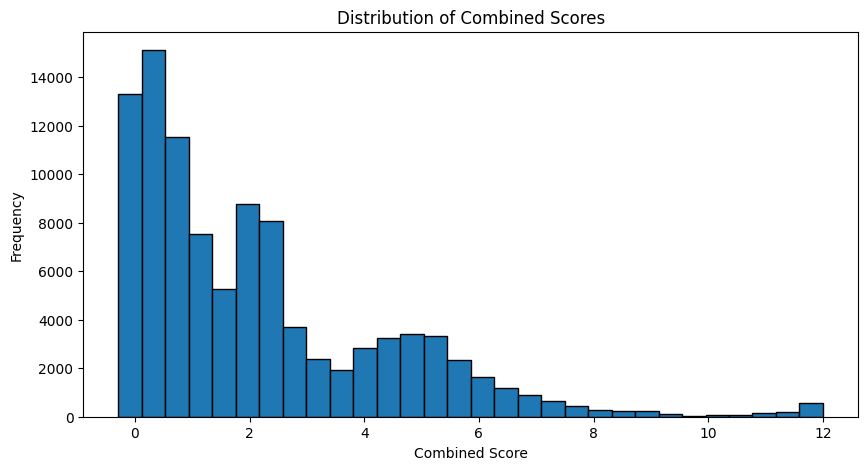

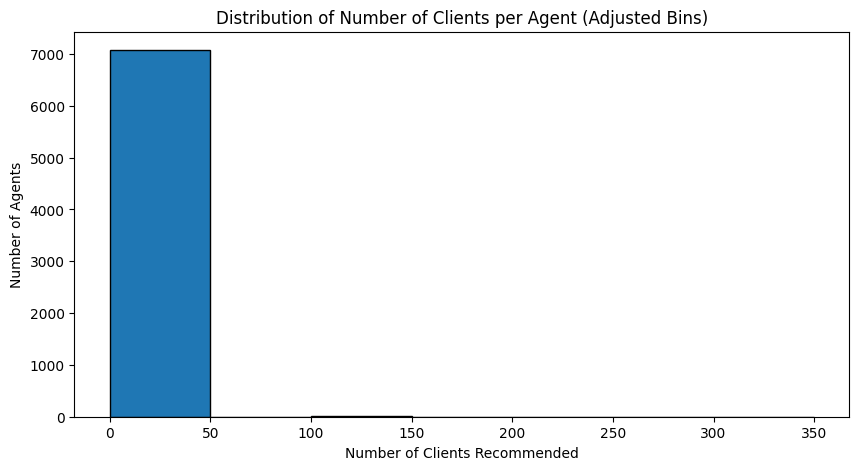

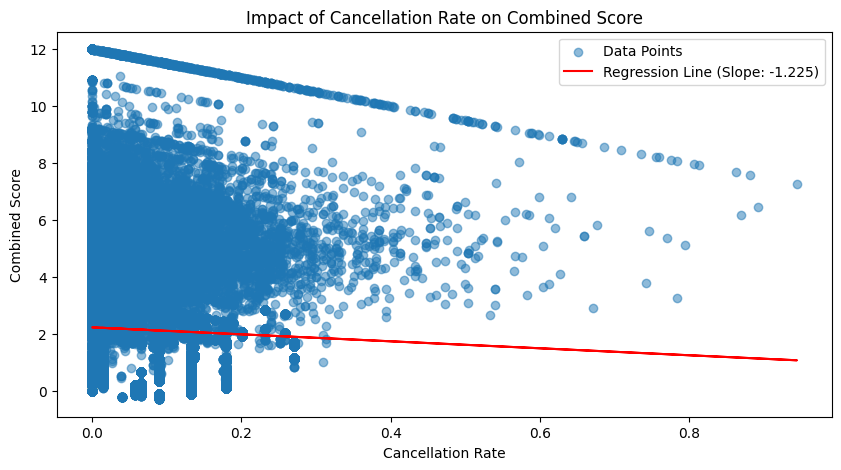

In [ ]:
# **Step 10: Visualizing the Results**
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import linregress


#  Histogram of Combined Scores
plt.figure(figsize=(10, 5))
plt.hist(final_recommendations["combined_score"], bins=30, edgecolor="black")
plt.title("Distribution of Combined Scores")
plt.xlabel("Combined Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of Number of Clients per Agent (Adjusted Bin Size)
agent_recommendation_counts = final_recommendations.groupby("agntnum")["secuityno"].nunique()

plt.figure(figsize=(10, 5))
bins = range(0, 400, 50)  # Define bins with a width of 50 up to 2000
plt.hist(agent_recommendation_counts, bins=bins, edgecolor="black")
plt.title("Distribution of Number of Clients per Agent (Adjusted Bins)")
plt.xlabel("Number of Clients Recommended")
plt.ylabel("Number of Agents")
plt.xticks(ticks=bins)  # Set x-axis ticks to match bin edges
plt.show()




#  Impact of Cancellation Rate on Combined Score
x = final_recommendations["pct_cancel"]
y = final_recommendations["combined_score"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5, label="Data Points")
plt.plot(x, regression_line, color="red", label=f"Regression Line (Slope: {slope:.3f})")
plt.title("Impact of Cancellation Rate on Combined Score")
plt.xlabel("Cancellation Rate")
plt.ylabel("Combined Score")
plt.legend()
plt.show()